In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## Read the csv file into the dataframe using pandas
data = pd.read_csv("data/data_tohoku_norm_transpose.csv", header=None)

In [4]:
time = pd.date_range("2:46PM", "6:46PM", freq="1s")

In [5]:
time

DatetimeIndex(['2017-11-15 14:46:00', '2017-11-15 14:46:01',
               '2017-11-15 14:46:02', '2017-11-15 14:46:03',
               '2017-11-15 14:46:04', '2017-11-15 14:46:05',
               '2017-11-15 14:46:06', '2017-11-15 14:46:07',
               '2017-11-15 14:46:08', '2017-11-15 14:46:09',
               ...
               '2017-11-15 18:45:51', '2017-11-15 18:45:52',
               '2017-11-15 18:45:53', '2017-11-15 18:45:54',
               '2017-11-15 18:45:55', '2017-11-15 18:45:56',
               '2017-11-15 18:45:57', '2017-11-15 18:45:58',
               '2017-11-15 18:45:59', '2017-11-15 18:46:00'],
              dtype='datetime64[ns]', length=14401, freq='S')

In [6]:
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]

## number of station 
station = pd.Series(range(0,438))
station = station.astype(int)

In [25]:
locations = pd.read_csv("data/location.txt",
                        delimiter="\t", names =["longitude", "latitude", "a", "b"])
del locations["a"], locations["b"]

In [26]:
cols = locations.columns.tolist()
cols = cols[-1:] + cols[:-1]
locations = locations[cols]


In [27]:
locations['station'] =station
locations.set_index('station',inplace=True)

In [28]:
locations


,latitude,longitude
station,,
0,27.065,-98.683
1,26.938,-98.102
2,26.463,-98.068
3,32.889,-117.110
4,32.532,-107.790
5,32.608,-98.916
6,32.573,-98.079
7,32.557,-97.410
8,32.475,-96.530


In [29]:
from haversine import haversine

## lat and long values of the tohuku quake
tohuku_loc=[38.3,142.4]
tohuku_loc
x=[]


for i in station:
    #print(i)
    x.append(haversine(locations.loc[i], tohuku_loc,miles=True))
    #dist = haversine(locations.loc[i], tohuku_loc,miles=True)

In [30]:
locations['distance'] =x

In [31]:
location_sort=locations.sort_values('distance')

In [14]:
location_sort

,latitude,longitude,distance
station,,,
83,48.720,-122.710,4495.397254
122,47.535,-123.090,4521.916888
94,48.264,-122.100,4535.498351
123,47.179,-122.770,4547.384419
151,46.083,-123.010,4576.791105
137,46.557,-122.570,4577.710999
107,47.923,-120.890,4595.437062
165,45.212,-123.260,4597.805440
193,44.106,-123.850,4613.014119


### Normalizing the sesimic data 

In [35]:
data.min().min()
data.max().max()
data_norm = (data - data.min() ) / (data.max() - data.min())

1.0

In [16]:
data_norm

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
0,0.453386,0.449605,0.507832,0.619884,0.408154,0.496555,0.447939,0.434600,0.524086,0.518532,...,0.468364,0.564907,0.451699,0.487540,0.520191,0.521935,0.490417,0.491169,0.471351,0.487916
1,0.453395,0.449595,0.507834,0.619877,0.408163,0.496563,0.447962,0.434599,0.524081,0.518586,...,0.468384,0.564951,0.451680,0.487545,0.520221,0.521905,0.490399,0.491117,0.471350,0.487909
2,0.453405,0.449586,0.507835,0.619871,0.408171,0.496571,0.447986,0.434599,0.524075,0.518638,...,0.468405,0.564994,0.451662,0.487549,0.520250,0.521875,0.490382,0.491068,0.471347,0.487903
3,0.453414,0.449578,0.507834,0.619867,0.408178,0.496577,0.448008,0.434599,0.524069,0.518686,...,0.468424,0.565033,0.451644,0.487553,0.520276,0.521847,0.490365,0.491020,0.471344,0.487897
4,0.453423,0.449571,0.507832,0.619863,0.408184,0.496583,0.448028,0.434599,0.524063,0.518730,...,0.468442,0.565069,0.451628,0.487557,0.520300,0.521821,0.490349,0.490977,0.471339,0.487892
5,0.453433,0.449565,0.507828,0.619861,0.408189,0.496589,0.448047,0.434600,0.524057,0.518769,...,0.468459,0.565101,0.451613,0.487559,0.520321,0.521797,0.490335,0.490938,0.471335,0.487887
6,0.453442,0.449560,0.507824,0.619860,0.408194,0.496593,0.448064,0.434601,0.524051,0.518802,...,0.468474,0.565128,0.451600,0.487562,0.520338,0.521777,0.490324,0.490904,0.471329,0.487884
7,0.453451,0.449556,0.507818,0.619861,0.408197,0.496596,0.448078,0.434601,0.524045,0.518829,...,0.468487,0.565150,0.451589,0.487563,0.520353,0.521761,0.490314,0.490875,0.471324,0.487881
8,0.453460,0.449554,0.507813,0.619862,0.408199,0.496599,0.448090,0.434602,0.524040,0.518850,...,0.468498,0.565168,0.451580,0.487565,0.520365,0.521747,0.490306,0.490851,0.471318,0.487879
9,0.453468,0.449552,0.507807,0.619863,0.408200,0.496601,0.448100,0.434603,0.524036,0.518866,...,0.468507,0.565180,0.451573,0.487565,0.520374,0.521736,0.490300,0.490833,0.471312,0.487877


### Creating index  in the data frame using the time.

In [17]:
data['time']=v
data.set_index('time',inplace=True)

In [18]:
data.shape

(14401, 438)

In [19]:
data.size

6307638

In [20]:
### Creation of the slider using time

NameError: name 'array_vals' is not defined

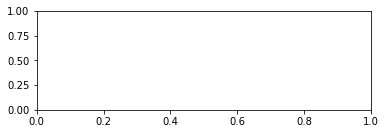

In [21]:
import ipywidgets


@ipywidgets.interact(station = (0, 437, 1))
def make_plot(station = 0):
    plt.subplot(211)
    plt.plot(array_vals[station])
    plt.xlim(0, 14000)
    plt.ylim(-1.0, 1.0)
    plt.subplot(212)
    plt.scatter(locations.iloc[station]["longitude"], locations.iloc[station]["latitude"])
    plt.xlim(-180, 180)
    plt.ylim(-90, 90)

In [1]:
import cartopy